In [1]:
from tensorflow.keras.applications.resnet50 import ResNet50

In [5]:
model = ResNet50(weights='imagenet')

In [6]:
model.summary()

Model: "resnet50"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_2 (InputLayer)            [(None, 224, 224, 3) 0                                            
__________________________________________________________________________________________________
conv1_pad (ZeroPadding2D)       (None, 230, 230, 3)  0           input_2[0][0]                    
__________________________________________________________________________________________________
conv1_conv (Conv2D)             (None, 112, 112, 64) 9472        conv1_pad[0][0]                  
__________________________________________________________________________________________________
conv1_bn (BatchNormalization)   (None, 112, 112, 64) 256         conv1_conv[0][0]                 
___________________________________________________________________________________________

In [8]:
# 분류에 사용할 이미지 불러오기

from tensorflow.keras.preprocessing.image import load_img 
import os

img_path = os.getcwd() + './img/'

dog_img = load_img(img_path+'dog.jpg',target_size=(224,224))
cat_img = load_img(img_path+'cat.jpg',target_size=(224,224))

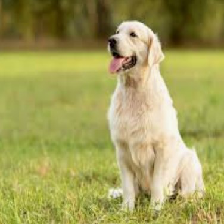

In [9]:
dog_img

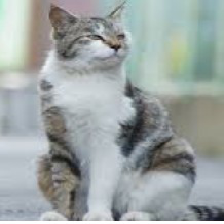

In [10]:
cat_img

### 모델에 맞는 전처리

In [12]:
from tensorflow.keras.preprocessing.image import img_to_array

arr_dog = img_to_array(dog_img)
arr_cat = img_to_array(cat_img)

In [13]:
print(f'shape of arr_dog = {arr_dog.shape}')
print(f'shape of arr_cat = {arr_cat.shape}')

shape of arr_dog = (224, 224, 3)
shape of arr_cat = (224, 224, 3)


In [14]:
# batch_size = 2 구현하기 위해서 두 장의 이미지를 하나로 합친다

import numpy as np

arr_input = np.stack([arr_dog, arr_cat])

In [16]:
# 하나로 합친 이미지의 크기를 확인한다

print(f'shape of arr_input = {arr_input.shape}')

shape of arr_input = (2, 224, 224, 3)


In [17]:
# 이미지 예측 수행
pred = model.predict(arr_input)

In [21]:
# 입력 이미지에 대한 예측 결과 가져오기

from tensorflow.keras.applications.resnet50 import decode_predictions

results = decode_predictions(pred)

In [22]:
# 개의 이미지에 대한 예측 결과 확인
pred_dog = results[0]
print(pred_dog)

[('n02100735', 'English_setter', 0.8863013), ('n02101556', 'clumber', 0.02928502), ('n02090721', 'Irish_wolfhound', 0.020816673), ('n02113799', 'standard_poodle', 0.017347407), ('n02099601', 'golden_retriever', 0.010692597)]


In [23]:
# 고양이의 이미지에 대한 예측 결과 확인
pred_cat = results[1]
print(pred_cat)

[('n02124075', 'Egyptian_cat', 0.6009296), ('n02123045', 'tabby', 0.16905956), ('n02123159', 'tiger_cat', 0.0773005), ('n02091467', 'Norwegian_elkhound', 0.06227924), ('n02127052', 'lynx', 0.027667712)]
